In [1]:
from tqdm import tqdm
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec

matplotlib.style.use('default')
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.grid'] = False

np.random.seed(13)

In [2]:
a = 1e-2

# number of simulation
M = 1000000

# number of runner
N = 1000

In [3]:
def logpdf(array, a=1):
    # return -a * np.sum(((array[0] - array[1]) ** 2) / (2 * a ** 2) + array[0] ** 2 / 2)
    _array = np.diff(np.append(array, array[0]))
    return -a * np.sum(np.power(_array, 2) / (2 * a ** 2) + np.power(array, 2) ** 2 / 2)

def metropolis(array, i, a):
    _array = array.copy()
    _array[i] += np.random.normal(scale=a)

    # delta = logpdf(np.array([_array[i], _array[(i-1+N)//N]]), a=a)
    # delta -= logpdf(np.array([array[i], array[(i-1+N)//N]]), a=a)
    delta = logpdf(_array, a=a) - logpdf(array, a=a)
    r = np.random.uniform()
    if delta > np.log(r):
        return _array
    else:
        return array

def x2_mean(a):
    # return 1 / (2 * np.tanh(a * N / 2))
    return 1 / 2

In [4]:
array_repo = np.empty((M, N))
array_repo[0] = np.ones(N) * np.sqrt(x2_mean(a))

indices = np.random.default_rng().choice(N, size=M, replace=True)

In [5]:
for i, j in tqdm(zip(range(1, M), indices[1:]), total=M-1, miniters=100):
    array_repo[i] = metropolis(array_repo[i-1], j, a)

100%|███████████████████████████████████████████████████████████████████████████████████████| 999999/999999 [03:48<00:00, 4378.64it/s]


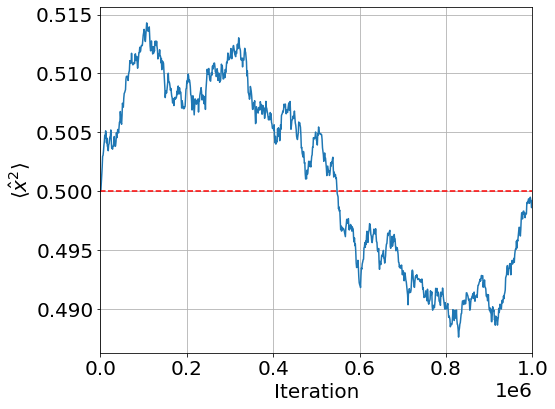

In [6]:
fig = plt.figure(figsize=(8, 6))
# fig.tight_layout()
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.20, right=0.95, top=0.95, bottom=0.15, wspace=0.25, hspace=0.25)
ax = fig.add_subplot(gs[0, 0])

ax.plot(np.arange(M)[::int(M//1e3)], np.average(array_repo ** 2, axis=1)[::int(M//1e3)])

ax.axhline(x2_mean(a), color='r', linestyle='dashed')

ax.set_xlabel('Iteration')
ax.set_ylabel(r'$\langle\hat{x}^2\rangle$')
ax.set_xlim(0, M)
ax.grid()
ax.xaxis.get_major_formatter().set_powerlimits((0, 0))
# ax.legend()
# ax.set_yscale('log')

fig.savefig('iterations.svg', transparent=True)
fig.savefig('iterations.png', dpi=300, transparent=True)

plt.show()

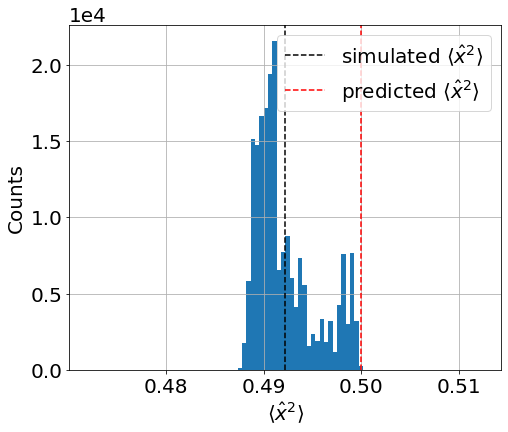

In [7]:
fig = plt.figure(figsize=(8, 6))
# fig.tight_layout()
gs = gridspec.GridSpec(1, 1, figure=fig, left=0.20, right=0.95, top=0.95, bottom=0.15, wspace=0.25, hspace=0.25)
ax = fig.add_subplot(gs[0, 0])

fraction = 0.2
_M = int(M * (1 - fraction))
_x2_average = np.average(array_repo ** 2, axis=1)[_M:]
_bins = np.linspace(
    _x2_average.mean() - 7 * _x2_average.std(),
    _x2_average.mean() + 7 * _x2_average.std(), 101)

ax.hist(_x2_average, bins=_bins)

ax.axvline(_x2_average.mean(), 
           color='k', linestyle='dashed', label=r'simulated $\langle\hat{x}^2\rangle$')
ax.axvline(x2_mean(a), 
           color='r', linestyle='dashed', label=r'predicted $\langle\hat{x}^2\rangle$')

ax.set_xlabel(r'$\langle\hat{x}^2\rangle$')
ax.set_ylabel('Counts')
ax.set_xlim(_bins[0], _bins[-1])
ax.grid()
ax.legend()
ax.yaxis.get_major_formatter().set_powerlimits((0, 0))
# ax.set_yscale('log')

fig.savefig('x2_hist.svg', transparent=True)
fig.savefig('x2_hist.png', dpi=300, transparent=True)

plt.show()